# Load Libraries

To install these libraries use: ```pip install numpy matplotlib librosa```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

import librosa
import librosa.display

# Load Basic Music File

I will use one of the FMA examples. I just randomly took the first one.

In [2]:
# test music file or any other file
music_file = '../data/fma_small/000/000002.mp3'

# load our test music file in librosa
y, sr = librosa.load(music_file)

In [3]:
# Calculate Low Level Features

In [4]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: 161.50 beats per minute


# STFT Calculation Example

[Text(0.5, 1.0, 'Percussive spectrogram')]

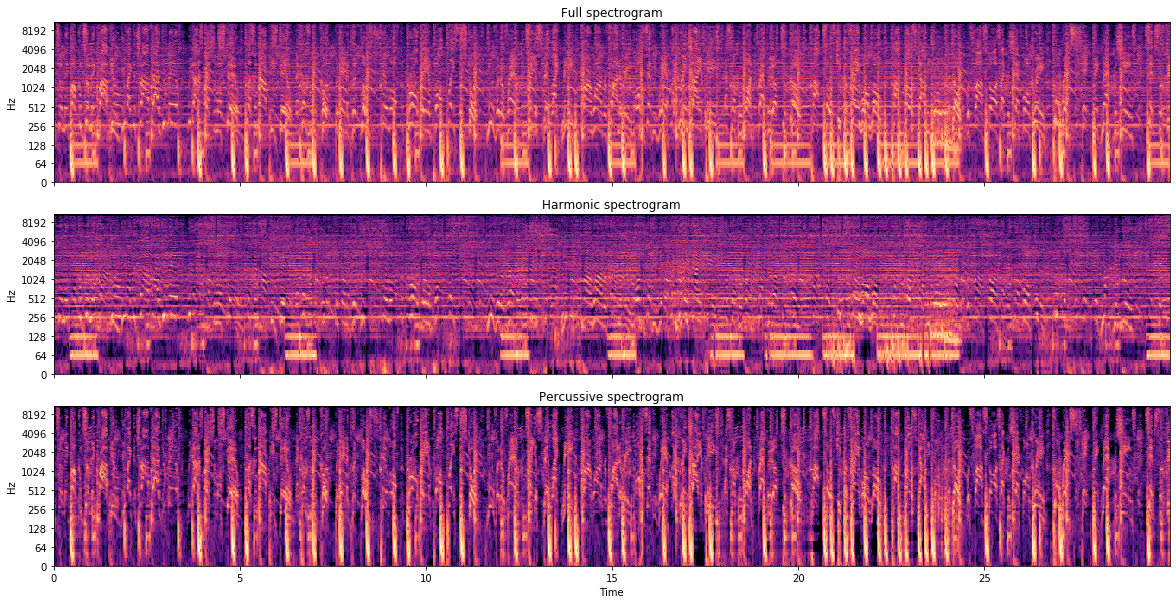

In [6]:
D = librosa.stft(y)

D_harmonic, D_percussive = librosa.decompose.hpss(D)

# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Full spectrogram')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic spectrogram')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive spectrogram')
# fig.colorbar(img, ax=ax)

# Extract Features With a Neural Network